## 1. Classic American names
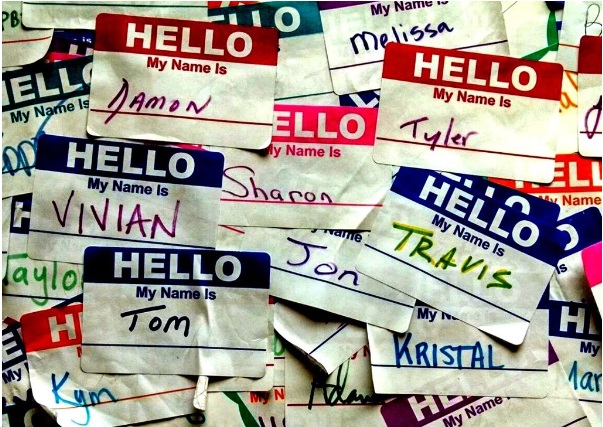
<p>Photo by Travis Wise on <a href="https://commons.wikimedia.org/wiki/File:Hello_My_Name_Is_(15283079263).jpg">Wikimedia</a>.</p>
<p>How have American baby name tastes changed since 1920?  Which names have remained popular for over 100 years, and how do those names compare to more recent top baby names? These are considerations for many new parents, but the skills we'll practice while answering these queries are broadly applicable. After all, understanding trends and popularity is important for many businesses, too! </p>
<p>We'll be working with data provided by the United States Social Security Administration, which lists first names along with the number and sex of babies they were given to in each year. For processing speed purposes, we've limited the dataset to first names which were given to over 5,000 American babies in a given year. Our data spans 101 years, from 1920 through 2020.</p>
<h3 id="baby_names"><code>baby_names</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>year</td>
</tr>
<tr>
<td style="text-align:left;"><code>first_name</code></td>
<td>varchar</td>
<td>first name</td>
</tr>
<tr>
<td style="text-align:left;"><code>sex</code></td>
<td>varchar</td>
<td><code>sex</code> of babies given <code>first_name</code></td>
</tr>
<tr>
<td style="text-align:left;"><code>num</code></td>
<td>int</td>
<td>number of babies of <code>sex</code> given <code>first_name</code> in that <code>year</code></td>
</tr>
</tbody>
</table>
<p>Let's get oriented to American baby name tastes by looking at the names that have stood the test of time!</p>

### Install sql into jupyter lab
make sure %%capture is in **the first line**

In [11]:
%%capture
%load_ext sql

### Access to local host to get data
<p> Load dataset into mysql database
<p> Make sure to write "%%sql" in the first line of every cell you want to run SQL query
<p> Load data into jupyter lab:
    
- <code>database</code>://<code>username</code>:<code>password</code>@localhost:<code>portid</code>/<code>databasename</code>.

<p> In this case, the username doesn't have a password

In [12]:
%%sql
mysql://root@localhost:3306/baby_names

select * from usa_baby_names limit 10;

10 rows affected.


year,first_name,sex,num
1920,Mary,F,70982
1920,Dorothy,F,36643
1920,Helen,F,35097
1920,Margaret,F,27994
1920,Ruth,F,26101
1920,Mildred,F,18059
1920,Virginia,F,17314
1920,Elizabeth,F,15909
1920,Frances,F,15883
1920,Anna,F,14581


## Task 1:
Find names that have been given to over 5,000 babies of either sex every year for the 101 years from 1920 through 2020; 
recall that names only show up in our dataset when at least 5,000 babies have been given that name in year.nding.

In [13]:
%%sql

# Select first_name and the total number of babies that have ever been given that name
# Group by first_name and filter for those names that appear in all 101 years
# Order the results by the total number of babies that have ever been given that name, descending

select first_name, sum(num)
from usa_baby_names
group by first_name
having count(year) = 101
order by sum(num) desc;

 * mysql://root@localhost:3306/baby_names
8 rows affected.


first_name,sum(num)
James,4748138
John,4510721
William,3614424
David,3571498
Joseph,2361382
Thomas,2166802
Charles,2112352
Elizabeth,1436286


### Query Explanation
- The having **count(year) = 101** ensures that the names appear in all 101 years (from 1920 to 2020).
- The **sum(num)** column shows the total number of babies given these names across the 101 years.

### Conclusion
- There are eight names have been consistently popular over 101 years, with each name being given to more than 5,000 babies each year from 1920 through 2020.
- James is the most popular name with 4,748,138 occurrences.
- Elizabeth is the least frequent among the top names, with 1,436,286 occurrences. However, Elizabeth is the only female name in the list.

## 2. Timeless or trendy?
<p>Wow, it looks like there are a lot of timeless traditionally male names! Elizabeth is holding her own for the female names, too. </p>
<p>Now, let's broaden our understanding of the dataset by looking at all names. We'll attempt to capture the type of popularity that each name in the dataset enjoyed. Was the name classic and popular across many years or trendy, only popular for a few years? Let's find out. </p>

## Task 2:
Classify each name's popularity according to the number of years that the name appears in the dataset_name.

In [14]:
%%sql

# Select first_name, the sum of babies who've ever been given that name, and popularity_type.
# Classify all names in the dataset as 'Classic,' 'Semi-classic,' 'Semi-trendy,' or 'Trendy' 
# based on whether the name appears in the dataset more than 80, 50, 20, or 0 times, respectively.
# Alias the new classification column as popularity_type.
# Order the results alphabetically by first_name.

select first_name, sum(num),
    Case 
        when count(year) > 80 then 'Classic'
        when count(year) > 50 then 'Semi-Classic'
        when count(year) > 20 then 'Semi-Trendy'
        Else 'Trendy'
    end as popularity_type
from usa_baby_names
group by first_name
order by first_name;

 * mysql://root@localhost:3306/baby_names
547 rows affected.


first_name,sum(num),popularity_type
Aaliyah,15870,Trendy
Aaron,530592,Semi-Classic
Abigail,338485,Semi-Trendy
Adam,497293,Semi-Trendy
Addison,107433,Trendy
Adrian,147741,Semi-Trendy
Aidan,68566,Trendy
Aiden,216194,Trendy
Alan,162041,Semi-Trendy
Albert,260945,Semi-Trendy


### Query explanation
The query aims to classify baby names into categories based on their presence across years. 
- The **CASE WHEN** statement is used to categorize the names into four distinct popularity types.
- The **sum(num)** column represents the total count of babies named that particular name over all the years it has appeared.

### Conclusion
The query successfully classifies names based on their historical presence in the dataset.
The classification provides insight into the long-term popularity trends of baby names in the United States:

- Names like Aaliyah and Addison are considered "Trendy" due to their relatively recent or infrequent use.
- Names like Abigail and Adam are considered "Semi-Trendy", reflecting temporary naming influences. Those names are in favor for a few decades but never becoming long-term staples of baby naming trends.
- Names such as Aaron fall into the "Semi-Classic" category, indicating more consistent use over the years but not quite at the level of "Classic" names.
- Names like James and Michael are considered "Classic", representing enduring popularity that carry a timeless quality, making them well-suited for use across generations.


*insert chart_1*

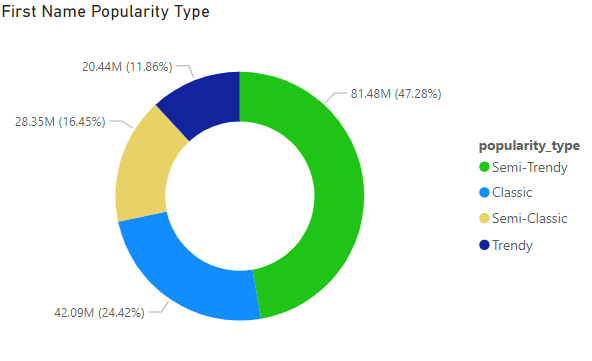

## 3. Top-ranked female names since 1920
<p>Did you find your favorite American celebrity's name on the popularity chart? Was it classic or trendy? How do you think the name Henry did? What about Jaxon?</p>
<p>Since we didn't get many traditionally female names in our classic American names search in the first task, let's limit our search to names which were given to female babies. </p>
<p>We can use this opportunity to practice window functions by assigning a rank to female names based on the number of babies that have ever been given that name. What are the top-ranked female names since 1920?</p>

## Task 3: 
Let's take a look at the ten highest-ranked American female names in our dataset.

In [15]:
%%sql

-- RANK names by the sum of babies who have ever had that name (descending), aliasing as name_rank
-- Select name_rank, first_name, and the sum of babies who have ever had that name
-- Filter the data for results where sex equals 'F'
-- Limit to ten results

select rank() over(order by sum(num) desc) as name_rank, first_name, sum(num)
from usa_baby_names
where sex = 'F'
group by first_name
order by name_rank
limit 10;

 * mysql://root@localhost:3306/baby_names
10 rows affected.


name_rank,first_name,sum(num)
1,Mary,3215850
2,Patricia,1479802
3,Elizabeth,1436286
4,Jennifer,1404743
5,Linda,1361021
6,Barbara,1343901
7,Susan,1025728
8,Jessica,994210
9,Lisa,920119
10,Betty,893396


### Query explanation
The query ranks female names in the dataset by their total count (sum of occurrences) using the <code>rank()</code> function.
<p></p>The names are filtered where the sex is 'F' (female), and the result is ordered by the rank of in ascending order.
<p></p>The query limits the output to the top 10 names ranked by total occurrences.

### Conclusion
- When names rank in the top 10, it signifies that these names have been highly favored and frequently chosen over a significant period of time.
- Names that appear in the top 10 tend to show long-term popularity, reflecting either classic names that have remained stable across generations or names that have surged in recent years due to cultural, celebrity, or media influence.

*insert chart_2*

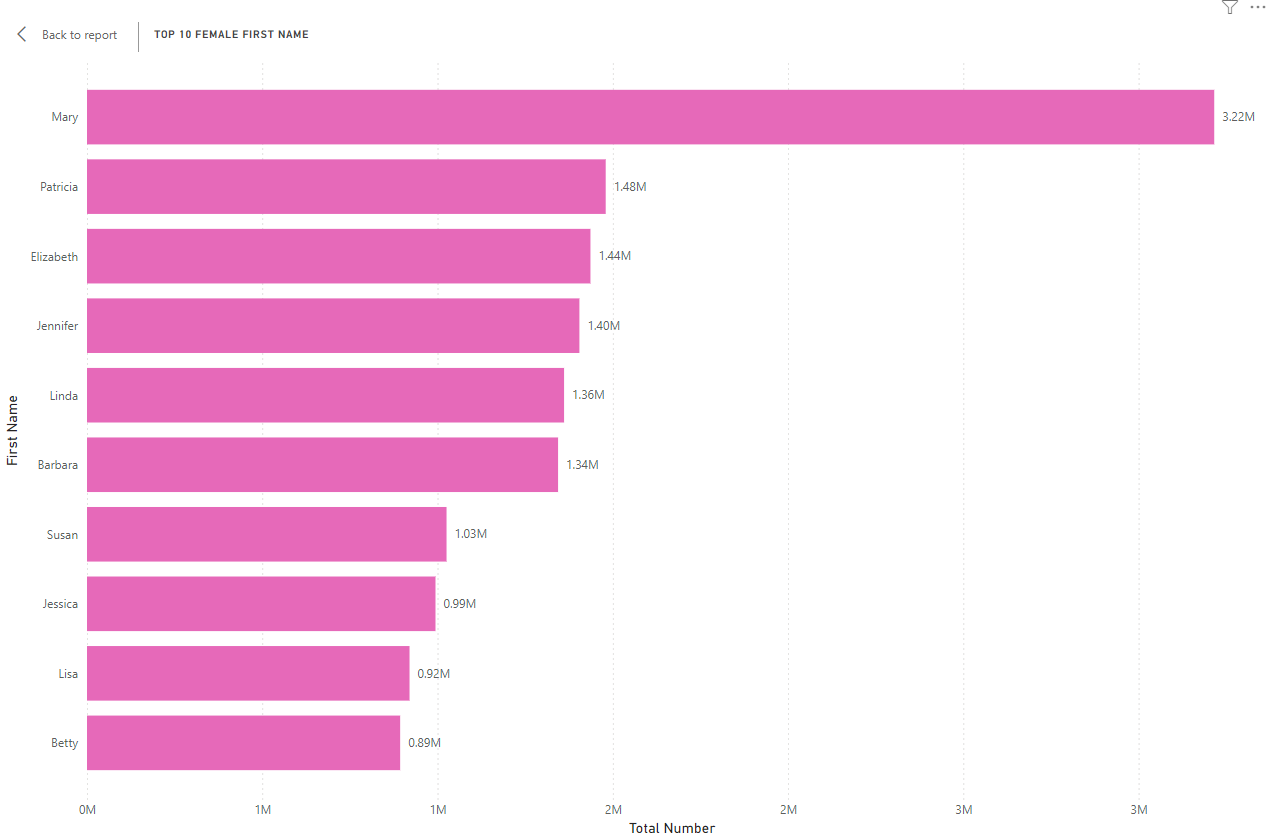

## 4. Picking a baby name
<p>Perhaps a friend has heard of our work analyzing baby names and would like help choosing a name for her baby, a girl. She doesn't like any of the top-ranked names we found in the previous task. </p>
<p>She's set on a traditionally female name ending in the letter 'a' since she's heard that vowels in baby names are trendy. She's also looking for a name that has been popular in the years since 2015. </p>
<p>Let's see what we can do to find some options for this friend!</p>

In [16]:
%%sql

-- Select only the first_name column
-- Filter for results where sex is 'F', year is greater than 2015, and first_name ends in 'a'
-- Group by first_name and order by the total number of babies given that first_name

select first_name
from usa_baby_names
where sex = 'F' and year > 2015 and first_name like '%a'
group by first_name
order by sum(num) desc;

 * mysql://root@localhost:3306/baby_names
19 rows affected.


first_name
Olivia
Emma
Ava
Sophia
Isabella
Mia
Amelia
Ella
Sofia
Camila


### Query explanation
The **LIKE '%a'** pattern matches any string that ends with "a". This condition ensures that only names ending with the letter 'a' are returned. 

### Conclusion
The query successfully returns a list of female baby names that end with the letter 'a' and have been popular since 2015. This set of names aligns with the trend your friend is interested in: names ending in a vowel, particularly 'a', which are currently fashionable.

## 5. The Olivia expansion
<p>Based on the results in the previous task, we can see that Olivia is the most popular female name ending in 'A' since 2015. When did the name Olivia become so popular?</p>
<p>Let's explore the rise of the name Olivia with the help of a window function.</p>

## Task 5: 
Find the cumulative number of babies named Olivia over the years since the name first appeared in our datasetrecent.

In [17]:
%%sql

-- Select year, first_name, num of Olivias in that year, and cumulative_olivias
-- Use window function, Sum the cumulative babies who have been named Olivia up to that year; 
-- alias as cumulative_olivias
-- Filter so that only data for the name Olivia is returned.
-- Order by year from the earliest year to most recent

select year, first_name, num, 
        sum(num) over (order by year) as cumulative_olivias -- order by year" sum cumulatively by year
from usa_baby_names
where first_name = 'Olivia'
order by year;

 * mysql://root@localhost:3306/baby_names
30 rows affected.


year,first_name,num,cumulative_olivias
1991,Olivia,5601,5601
1992,Olivia,5809,11410
1993,Olivia,6340,17750
1994,Olivia,6434,24184
1995,Olivia,7624,31808
1996,Olivia,8124,39932
1997,Olivia,9477,49409
1998,Olivia,10610,60019
1999,Olivia,11255,71274
2000,Olivia,12852,84126


### Query explanation
The **window function sum() over** that calculates the cumulative sum of the num column (the number of babies named "Olivia") over the years.
<p>It sums the values of num (number of occurrences of the name "Olivia"). 
<p>The over (order by year) clause tells the database to compute this sum for each row in the result set, ordered by the year. 
<p>It will keep adding the number of occurrences of "Olivia" for each subsequent year.
<p>For example, if there were 100 babies named Olivia in 2000, and 120 babies named Olivia in 2001, the cumulative sum for 2001 would be 100 (from 2000) + 120 (from 2001) = 220.
<p>The result is aliased as cumulative_olivias, meaning this column in the result set will be named cumulative_olivias.


### Conclusion
- The number of babies named Olivia has increased steadily over the years. In 1991, 5,601 babies were named Olivia, and by 2020, this number had risen to 17,535, demonstrating the growing popularity of the name.
- The cumulative total and yearly counts show that Olivia is now one of the most popular modern baby names, and its sustained popularity suggests that it will likely remain a favorite in the near future.

*insert chart_3*

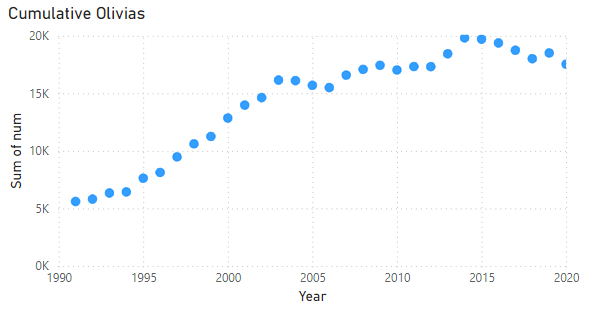

## 6. Many males with the same name
<p>Wow, Olivia has had a meteoric rise! Let's take a look at traditionally male names now. We saw in the first task that there are nine traditionally male names given to at least 5,000 babies every single year in our 101-year dataset! Those names are classics, but showing up in the dataset every year doesn't necessarily mean that the timeless names were the most popular. Let's explore popular male names a little further.</p>
<p>In the next two tasks, we will build up to listing every year along with the most popular male name in that year. This presents a common problem: how do we find the greatest X in a group? Or, in the context of this problem, how do we find the male name given to the highest number of babies in a year? </p>
<p>In SQL, one approach is to use a subquery. We can first write a query that selects the <code>year</code> and the maximum <code>num</code> of babies given any single male name in that year. For example, in 1989, the male name given to the highest number of babies was given to 65,339 babies. We'll write this query in this task. In the next task, we can use the code from this task as a subquery to look up the <code>first_name</code> that was given to 65,339 babies in 1989… as well as the top male first name for all other years!</p>

## Task 6:
Write a query that selects the year and the maximum num of babies given any male name in that year.

In [18]:
%%sql

-- Select year and maximum number of babies given any one male name in that year, aliased as max_num
-- Filter the data to include only results where sex equals 'M'

select year, max(num) as max_num
from usa_baby_names
where sex = 'M'
group by year;

 * mysql://root@localhost:3306/baby_names
101 rows affected.


year,max_num
1920,56914
1921,58215
1922,57280
1923,57469
1924,60801
1925,60897
1926,61130
1927,61671
1928,60703
1929,59804


## 7. Top male names over the years
<p>In the previous task, we found the maximum number of babies given any one male name in each year. Incredibly, the most popular name each year varied from being given to less than 20,000 babies to being given to more than 90,000! </p>
<p>In this task, we find out what that top male name is for each year in our dataset. </p>

## Task 7:
Using the previous task's code as a subquery, 
look up the first_name that corresponds to the maximum number of babies given a specific male name in a yea year.

In [19]:
%%sql

-- Select year, first_name given to the largest number of male babies, and num of babies given that name
-- Join baby_names to the code in the last task as a subquery
-- using whatever alias you like and joining on both columns in the subquery
-- Order results by year descending

select b.year, b.first_name, b.num
from usa_baby_names as b
join (
    select year, max(num) as max_num
    from usa_baby_names
    where sex = 'M'
    group by year) as sub
on b.year = sub.year
and sub.max_num = b.num
order by year desc;

 * mysql://root@localhost:3306/baby_names
101 rows affected.


year,first_name,num
2020,Liam,19659
2019,Liam,20555
2018,Liam,19924
2017,Liam,18824
2016,Noah,19154
2015,Noah,19650
2014,Noah,19319
2013,Noah,18266
2012,Jacob,19088
2011,Jacob,20378


### Query Explanation
Join <code>usa_baby_names</code> and the subquery from the query of the previous task.
<p>This subquery selects the year and the maximum number of male babies in that year. The subquery generates a result that contains two columns: year and max_num. ALias as sub

<p>They join on both <code>year</code> columns and num = max_num:
    
- **b.year = sub.year**: This ensures the records from the main query and the subquery are from the same year.
- **sub.max_num = b.num**: This matches the maximum number of babies (sub.max_num) found in the subquery with the actual number of babies (b.num) from the main table. Essentially, it ensures you're selecting the most popular male name for each year.

<code>order by year desc</code>: Finally, the results are ordered by year in descending order, meaning the most recent year appears first.

### Conclusion
- **Liam** has been the most popular male baby name from 2017 to 2020, with a consistently high number of occurrences each year. The popularity of Liam seems to have increased in recent years, peaking in 2019 with 20,555 babies given the name.
- **Noah** dominated from 2013 to 2016, being the most popular male name for four consecutive years. Its peak occurred in 2015 with 19,650 babies named Noah.
- **Jacob** was the leading name from 2010 to 2012, and 2010 saw the highest occurrence of 22,139 babies named Jacob during this period, making it the most popular male name in that year.

*insert chart_4*

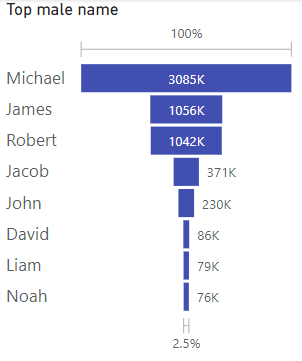

## 8. The most years at number one
<p>Noah and Liam have ruled the roost in the last few years, but if we scroll down in the results, it looks like Michael and Jacob have also spent a good number of years as the top name! Which name has been number one for the largest number of years? Let's use a common table expression to find out. </p>

## Task 8:
Return a list of first names that have been the top male first name 
in any year along with a count of the number of years that name has been the top name.

In [20]:
%%sql

-- Select first_name and a count of years it was the top name in the last task; alias as count_top_name
-- Use the code from the previous task as a common table expression
-- Group by first_name and order by count_top_name descending

with top_name as (
    select b.year, b.first_name, b.num
    from usa_baby_names as b
    join (
        select year, max(num) as max_num
        from usa_baby_names
        where sex = 'M'
        group by year) as sub
    on b.year = sub.year
    and sub.max_num = b.num
    order by year desc)

select first_name, count(year) as count_top_name
from top_name
group by first_name
order by count_top_name desc;

 * mysql://root@localhost:3306/baby_names
8 rows affected.


first_name,count_top_name
Michael,44
Robert,17
Jacob,14
James,13
Liam,4
John,4
Noah,4
David,1


### Query explanation
1. The query starts with defining a CTE named <code>top_name</code> and using the query from previous task. This CTE collects data about the most popular male baby name for each year.
2. Select <code>first_name</code>, <code>count(year)</code> as <code>count_top_name</code> from <code>top_name</code>
<p>This part of the query selects the first name and counts the number of years it was the most popular name (from the top_name CTE).
<p>The goal of this query is to find the male names that were the most popular across multiple years and rank them by how many years they were the top name. This is useful for identifying long-standing popular names that remained at the top of baby name rankings over several years.</p>


### Conclusion
- **Michael** is the most influential name, with over four decades of being the top choice for boys' names. Its sustained popularity suggests it resonates across multiple generations.
- The more recent popularity of names like **Liam** and **Noah** reflects changing baby name trends, with newer names rising to prominence in the 2010s.
- Classic names such as **James, John, and Robert** have had consistent appeal over the years but have been overtaken by modern names in more recent times.

*insert chart_5*

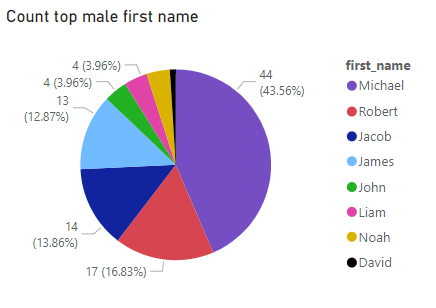